# Data Analysis - Issues data (Python + English + snapshot_20230727)

## Table of Contents
- [1. Data Profiling](#1.Data-Profiling)
- [2: Data Preparation](#2.Data-Preparation)
- [3. Data Analysis](#3.Data-Analysis)

## 1.Data-Profiling

### Load data

In [2]:
import pandas as pd
import os
import altair as alt # For visualization
from langdetect import detect, DetectorFactory # For Natural Language detection

In [4]:
# Read csv file
dir_path = "C:/Users/amali/Winter Term 2/DATA_542_Data Wrangling/Project/Data/DevGPT/cleaned/"

df = pd.read_csv(os.path.join(dir_path, "issue_total.csv"), index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2906 entries, 0 to 2905
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  2906 non-null   object 
 1   URL_issue             2906 non-null   object 
 2   Author                2906 non-null   object 
 3   RepoName              2906 non-null   object 
 4   RepoLanguage          1703 non-null   object 
 5   Number                2906 non-null   int64  
 6   Title_x               2906 non-null   object 
 7   Body                  2886 non-null   object 
 8   CreatedAt             2906 non-null   object 
 9   ClosedAt              1531 non-null   object 
 10  UpdatedAt             2906 non-null   object 
 11  State                 2906 non-null   object 
 12  source_date           2906 non-null   int64  
 13  URL_chatgptsharing_x  2906 non-null   object 
 14  Status                2906 non-null   int64  
 15  DateOfConversation    2580

In [5]:
df.describe()

,Number,source_date,Status,NumberOfPrompts,TokensOfPrompts,TokensOfAnswers
count,2906.000000,2906.0,2906.000000,2580.000000,2580.000000,2580.000000
mean,487.352719,20230727.0,222.885065,9.909302,1459.981783,4400.686047
std,4829.640568,0.0,64.391412,18.312491,3996.210906,9069.977740
min,1.000000,20230727.0,200.000000,1.000000,8.000000,30.000000
25%,4.000000,20230727.0,200.000000,1.000000,16.000000,407.000000
50%,78.000000,20230727.0,200.000000,2.000000,83.000000,723.500000
75%,198.000000,20230727.0,200.000000,10.000000,807.000000,3862.000000
max,126891.000000,20230727.0,404.000000,88.000000,23410.000000,45033.000000


### Missing Values

In [6]:
#Check if Null values present
df.isnull().sum()

Type                       0
URL_issue                  0
Author                     0
RepoName                   0
RepoLanguage            1203
Number                     0
Title_x                    0
Body                      20
CreatedAt                  0
ClosedAt                1375
UpdatedAt                  0
State                      0
source_date                0
URL_chatgptsharing_x       0
Status                     0
DateOfConversation       326
DateOfAccess             326
Title_y                  336
NumberOfPrompts          326
TokensOfPrompts          326
TokensOfAnswers          326
Model                    326
HTMLContent              326
URL_chatgptsharing_y       0
MentionedURL               0
MentionedProperty          0
MentionedAuthor            0
MentionedText              0
URL_chatgptsharing        28
Prompt                    30
Answer                    28
ListOfCode                28
dtype: int64

In [7]:
# Drop missing values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 904 to 2905
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  463 non-null    object 
 1   URL_issue             463 non-null    object 
 2   Author                463 non-null    object 
 3   RepoName              463 non-null    object 
 4   RepoLanguage          463 non-null    object 
 5   Number                463 non-null    int64  
 6   Title_x               463 non-null    object 
 7   Body                  463 non-null    object 
 8   CreatedAt             463 non-null    object 
 9   ClosedAt              463 non-null    object 
 10  UpdatedAt             463 non-null    object 
 11  State                 463 non-null    object 
 12  source_date           463 non-null    int64  
 13  URL_chatgptsharing_x  463 non-null    object 
 14  Status                463 non-null    int64  
 15  DateOfConversation    463

In [8]:
# Check if empty strings present in the dataset
(df == '').sum()

Type                    0
URL_issue               0
Author                  0
RepoName                0
RepoLanguage            0
Number                  0
Title_x                 0
Body                    0
CreatedAt               0
ClosedAt                0
UpdatedAt               0
State                   0
source_date             0
URL_chatgptsharing_x    0
Status                  0
DateOfConversation      0
DateOfAccess            0
Title_y                 0
NumberOfPrompts         0
TokensOfPrompts         0
TokensOfAnswers         0
Model                   0
HTMLContent             0
URL_chatgptsharing_y    0
MentionedURL            0
MentionedProperty       0
MentionedAuthor         0
MentionedText           0
URL_chatgptsharing      0
Prompt                  0
Answer                  0
ListOfCode              0
dtype: int64

In [9]:
#check duplicates
df.duplicated().sum()

54

In [10]:
# Drop duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 904 to 2905
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  409 non-null    object 
 1   URL_issue             409 non-null    object 
 2   Author                409 non-null    object 
 3   RepoName              409 non-null    object 
 4   RepoLanguage          409 non-null    object 
 5   Number                409 non-null    int64  
 6   Title_x               409 non-null    object 
 7   Body                  409 non-null    object 
 8   CreatedAt             409 non-null    object 
 9   ClosedAt              409 non-null    object 
 10  UpdatedAt             409 non-null    object 
 11  State                 409 non-null    object 
 12  source_date           409 non-null    int64  
 13  URL_chatgptsharing_x  409 non-null    object 
 14  Status                409 non-null    int64  
 15  DateOfConversation    409

In [11]:
#Convert to datetime
columns_to_convert = ['CreatedAt', 'ClosedAt','UpdatedAt']
for col in columns_to_convert:
    df[col] = pd.to_datetime(df[col])

print(df.dtypes)

Type                                 object
URL_issue                            object
Author                               object
RepoName                             object
RepoLanguage                         object
Number                                int64
Title_x                              object
Body                                 object
CreatedAt               datetime64[ns, UTC]
ClosedAt                datetime64[ns, UTC]
UpdatedAt               datetime64[ns, UTC]
State                                object
source_date                           int64
URL_chatgptsharing_x                 object
Status                                int64
DateOfConversation                   object
DateOfAccess                         object
Title_y                              object
NumberOfPrompts                     float64
TokensOfPrompts                     float64
TokensOfAnswers                     float64
Model                                object
HTMLContent                     

## 2.Data-Preparation

### Filter for 'Python' Repo language

In [12]:
# Check programming language distribution
df.groupby(["RepoLanguage"])['URL_issue'].count().sort_values(ascending = False)

RepoLanguage
Python              164
TypeScript           73
Java                 56
JavaScript           32
PHP                  31
C++                  14
C#                   11
HTML                  8
Go                    5
PLpgSQL               5
Ruby                  4
Jupyter Notebook      2
Shell                 2
CSS                   1
Rust                  1
Name: URL_issue, dtype: int64

In [13]:
dfp = df[df['RepoLanguage'] == 'Python']
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 917 to 2883
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Type                  164 non-null    object             
 1   URL_issue             164 non-null    object             
 2   Author                164 non-null    object             
 3   RepoName              164 non-null    object             
 4   RepoLanguage          164 non-null    object             
 5   Number                164 non-null    int64              
 6   Title_x               164 non-null    object             
 7   Body                  164 non-null    object             
 8   CreatedAt             164 non-null    datetime64[ns, UTC]
 9   ClosedAt              164 non-null    datetime64[ns, UTC]
 10  UpdatedAt             164 non-null    datetime64[ns, UTC]
 11  State                 164 non-null    object             
 12  source_dat

### Filter Chatgpt prompts in 'English'

In [14]:
# Fix randomness in language detection
DetectorFactory.seed = 0
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # Return False if language detection fails

def is_english_count(df):
    #df_col = df.select_dtypes(include=['object', 'string']).columns.tolist()
    df_col = ['Prompt']
    english_counts = {}
    for col in df_col:
        english_counts[col] = df[col].apply(is_english).sum()

    return english_counts

In [15]:
print(f' Number of prompts presented to ChatGPT that are in English language : {is_english_count(dfp)}\nTotal number of prompts in the dataset : {len(dfp)}')

 Number of prompts presented to ChatGPT that are in English language : {'Prompt': 122}
Total number of prompts in the dataset : 164


In [16]:
dfp_english = dfp[dfp['Prompt'].apply(is_english)]
dfp_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 922 to 2883
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Type                  122 non-null    object             
 1   URL_issue             122 non-null    object             
 2   Author                122 non-null    object             
 3   RepoName              122 non-null    object             
 4   RepoLanguage          122 non-null    object             
 5   Number                122 non-null    int64              
 6   Title_x               122 non-null    object             
 7   Body                  122 non-null    object             
 8   CreatedAt             122 non-null    datetime64[ns, UTC]
 9   ClosedAt              122 non-null    datetime64[ns, UTC]
 10  UpdatedAt             122 non-null    datetime64[ns, UTC]
 11  State                 122 non-null    object             
 12  source_dat

## 3.Data-Analysis

### 3.1 Number of ChatGPT interactions per issue

In [31]:
# Select only categorical columns
categorical_columns = dfp_english.select_dtypes(include=['object', 'category'])

# Count unique values for each categorical column
unique_counts = categorical_columns.nunique()

# Print results
print("Number of unique values for each categorical column:")
print(unique_counts)

Number of unique values for each categorical column:
Type                     1
URL_issue               24
Author                  17
RepoName                20
RepoLanguage             1
Title_x                 24
Body                    24
State                    1
URL_chatgptsharing_x    24
DateOfConversation      19
DateOfAccess            28
Title_y                 24
Model                    1
HTMLContent             28
URL_chatgptsharing_y    24
MentionedURL            28
MentionedProperty        2
MentionedAuthor         20
MentionedText           28
URL_chatgptsharing      24
Prompt                  88
Answer                  89
ListOfCode              55
dtype: int64


In [32]:
dfp_english_prompts = pd.DataFrame(dfp_english.groupby('URL_issue')['Prompt'].count())

In [33]:
dfp_english_prompts

,Prompt
URL_issue,
https://github.com/AndyGrant/OpenBench/issues/149,1
https://github.com/AntonOsika/gpt-engineer/issues/294,2
https://github.com/Delgan/loguru/issues/902,12
https://github.com/Delgan/loguru/issues/903,3
https://github.com/Elucidation/mapf-multiagent-robot-planning/issues/118,5
https://github.com/MauriceLe/PIMS/issues/73,22
https://github.com/NA-MIC/ProjectWeek/issues/724,1
https://github.com/OpenAdaptAI/OpenAdapt/issues/185,20
https://github.com/SafEight/wdm-project/issues/8,2


In [34]:
interactions_per_issue = dfp_english_prompts['Prompt'].mean()
interactions_per_issue

5.083333333333333

In [35]:
alt.Chart(dfp_english_prompts).mark_bar().encode(
    alt.X('Prompt', bin = alt.Bin(maxbins = 15), title = 'Number of ChatGPT Prompts per issue'),
    alt.Y('count()')
).properties(title = 'Histogram for the number of ChatGPT Prompts per issue', width = 400)

alt.Chart(...)

### 3.2 Average length of Prompt

In [17]:
dfp_english['TokensOfPrompts'].mean()

4401.5901639344265

In [18]:
dfp_english.groupby('URL_issue')['TokensOfPrompts'].mean().mean()

1227.4166666666667

### 3.3 Average length of Answer

In [19]:
dfp_english['TokensOfAnswers'].mean()

5716.44262295082

In [20]:
dfp_english.groupby('URL_issue')['TokensOfAnswers'].mean().mean()

2050.7291666666665

### 3.4 Average Number of Prompts per issue

In [38]:
dfp_english['NumberOfPrompts'].count()

122

In [40]:
dfp_english['NumberOfPrompts'].sum()

1467.0

In [41]:
dfp_english['NumberOfPrompts'].value_counts()

NumberOfPrompts
4.0     30
46.0    22
3.0     21
1.0     13
6.0     11
10.0    10
9.0      9
2.0      6
Name: count, dtype: int64

In [49]:
df_prompts = dfp_english[['URL_issue', 'NumberOfPrompts']]
df_prompts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 922 to 2883
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL_issue        122 non-null    object 
 1   NumberOfPrompts  122 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [50]:
df_prompts = df_prompts.drop_duplicates()
df_prompts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 922 to 2883
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL_issue        25 non-null     object 
 1   NumberOfPrompts  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


In [52]:
df_prompts.head(25)

,URL_issue,NumberOfPrompts
922,https://github.com/MauriceLe/PIMS/issues/73,46.0
1168,https://github.com/gorillamania/AICodeBot/issu...,10.0
1178,https://github.com/simonw/sqlite-utils/issues/563,6.0
1202,https://github.com/Elucidation/mapf-multiagent...,6.0
1335,https://github.com/AndyGrant/OpenBench/issues/149,1.0
1410,https://github.com/SafEight/wdm-project/issues/8,2.0
1519,https://github.com/internetarchive/openlibrary...,3.0
1570,https://github.com/nuhmanpk/Webtrench/issues/10,4.0
1596,https://github.com/simonw/symbex/issues/19,3.0
1620,https://github.com/NA-MIC/ProjectWeek/issues/724,1.0


In [54]:
df_prompts['URL_issue'].nunique()

24

In [56]:
df_prompts['NumberOfPrompts'].value_counts()

NumberOfPrompts
1.0     7
3.0     5
4.0     5
2.0     3
6.0     2
46.0    1
10.0    1
9.0     1
Name: count, dtype: int64

In [57]:
prompts_per_issue = df_prompts['NumberOfPrompts'].sum()/df_prompts['URL_issue'].nunique()
prompts_per_issue

5.208333333333333

### Average Close time of an issue

In [58]:
dfp_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 922 to 2883
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Type                  122 non-null    object             
 1   URL_issue             122 non-null    object             
 2   Author                122 non-null    object             
 3   RepoName              122 non-null    object             
 4   RepoLanguage          122 non-null    object             
 5   Number                122 non-null    int64              
 6   Title_x               122 non-null    object             
 7   Body                  122 non-null    object             
 8   CreatedAt             122 non-null    datetime64[ns, UTC]
 9   ClosedAt              122 non-null    datetime64[ns, UTC]
 10  UpdatedAt             122 non-null    datetime64[ns, UTC]
 11  State                 122 non-null    object             
 12  source_dat

In [60]:
dfp_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 922 to 2883
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Type                  122 non-null    object             
 1   URL_issue             122 non-null    object             
 2   Author                122 non-null    object             
 3   RepoName              122 non-null    object             
 4   RepoLanguage          122 non-null    object             
 5   Number                122 non-null    int64              
 6   Title_x               122 non-null    object             
 7   Body                  122 non-null    object             
 8   CreatedAt             122 non-null    datetime64[ns, UTC]
 9   ClosedAt              122 non-null    datetime64[ns, UTC]
 10  UpdatedAt             122 non-null    datetime64[ns, UTC]
 11  State                 122 non-null    object             
 12  source_dat

In [62]:
dfp_english['duration'] = (dfp_english['ClosedAt'] - dfp_english['CreatedAt']).dt.days
dfp_english['duration'].head(10)

C:\Users\amali\AppData\Local\Temp\ipykernel_26380\4277488856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_english['duration'] = (dfp_english['ClosedAt'] - dfp_english['CreatedAt']).dt.days


922    7
923    7
924    7
925    7
927    7
928    7
929    7
930    7
932    7
935    7
Name: duration, dtype: int64

In [64]:
dfp_english.groupby('URL_issue')['duration'].mean().mean()

16.625

## Word Cloud

In [65]:
dfp_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 922 to 2883
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Type                  122 non-null    object             
 1   URL_issue             122 non-null    object             
 2   Author                122 non-null    object             
 3   RepoName              122 non-null    object             
 4   RepoLanguage          122 non-null    object             
 5   Number                122 non-null    int64              
 6   Title_x               122 non-null    object             
 7   Body                  122 non-null    object             
 8   CreatedAt             122 non-null    datetime64[ns, UTC]
 9   ClosedAt              122 non-null    datetime64[ns, UTC]
 10  UpdatedAt             122 non-null    datetime64[ns, UTC]
 11  State                 122 non-null    object             
 12  source_dat

In [66]:
prompt = []
answer = []

for idx, row in dfp_english.iterrows(): 
    prompt.append(row['Prompt'])
    answer.append(row['Answer'])

In [ ]:
result = ' '.join(prompt)
#print(result)

In [70]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

sentences = nltk.sent_tokenize(result)
words = nltk.word_tokenize(result)

#### Stemming

In [71]:
stemmer = PorterStemmer()

# Stemming
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i]) #word_tokenize retreives each word in ith sentence
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))] # perform stemming if word is not a stop word
    sentences[i] = ' '.join(words)  # convert back to sentences


#### Lemmatization

In [72]:
sentences = nltk.sent_tokenize(result)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)  

text = "".join(sentences)

#### Word Cloud

Most Common Words:
def: 104
if: 104
20230708: 103
debug: 83
item: 77
get: 77
return: 77
of: 77
from: 66
scrapycoreengine: 66
crawled: 66
200: 64
referer: 63
none: 61
import: 61
response: 60
i: 59
httpswwwhoevelercomhomehtml: 57
yield: 56
span: 47
that: 44
115103: 43
this: 41
requesturlresponseurljoinitemget: 35
aattrhref: 34


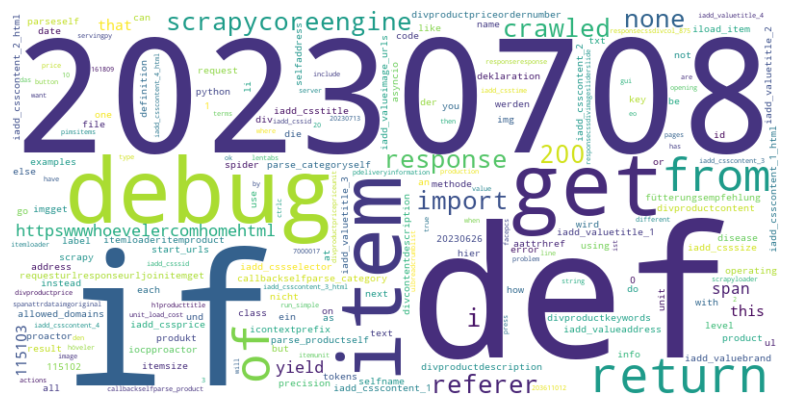

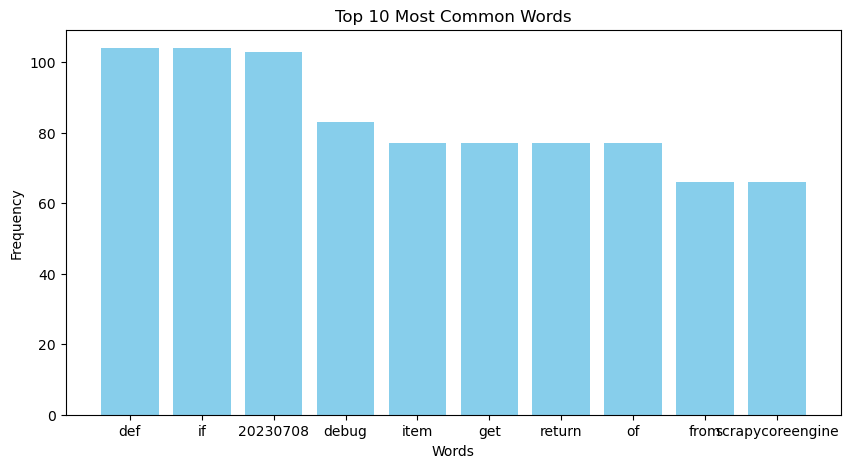

In [74]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Preprocess the text
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation and numbers   
    words = text.split()  # Tokenize the text
    return words

# Step 2: Remove stopwords (optional)
def remove_stopwords(words, stopwords=None):
    if stopwords is None:
        stopwords = {"is", "a", "for", "the", "and", "in", "it", "to"}
    return [word for word in words if word not in stopwords]

# Preprocess and clean the text
words = preprocess_text(text)
words = remove_stopwords(words)

# Step 3: Count word frequencies
word_counts = Counter(words)
#print(word_counts)

# Step 4: Display the most common words
print("Most Common Words:")
for word, count in word_counts.most_common(25):
    print(f"{word}: {count}")

# Step 5: Visualize the results
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bar Chart
most_common = word_counts.most_common(10)
words, counts = zip(*most_common)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


### LDA

In [79]:
import re
from nltk.tokenize import sent_tokenize

# Split the single string into sentences (documents)
documents = sent_tokenize(text)
#print(documents)


In [80]:
# Preprocessing function
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocessing function
def preprocess_text(text):
    # Lowercase and remove special characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to each sentence
processed_documents = [preprocess_text(doc) for doc in documents]


In [81]:
#Convert Text to a Bag-of-Words Representation
from gensim.corpora.dictionary import Dictionary

# Create dictionary and corpus
dictionary = Dictionary(processed_documents)
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]



In [85]:
#Apply LDA
from gensim.models.ldamodel import LdaModel

# Fit LDA model
lda_model = LdaModel(
    corpus=corpus, 
    id2word=dictionary, 
    num_topics=5, 
    random_state=42, 
    passes=10
)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}:\n{topic}\n")


Topic 0:
0.016*"use" + 0.010*"tokens" + 0.010*"instead" + 0.009*"info" + 0.009*"production" + 0.008*"text" + 0.007*"noobs" + 0.007*"truncate" + 0.007*"using" + 0.006*"want"

Topic 1:
0.022*"operating" + 0.016*"examples" + 0.011*"include" + 0.011*"opening" + 0.010*"different" + 0.010*"button" + 0.010*"window" + 0.010*"software" + 0.010*"apartment" + 0.010*"levels"

Topic 2:
0.016*"import" + 0.011*"20230708" + 0.009*"def" + 0.009*"debug" + 0.009*"response" + 0.008*"yield" + 0.008*"none" + 0.008*"item" + 0.008*"label" + 0.007*"get"

Topic 3:
0.021*"return" + 0.020*"def" + 0.017*"none" + 0.016*"item" + 0.014*"result" + 0.009*"die" + 0.009*"methode" + 0.009*"else" + 0.007*"ein" + 0.007*"produkt"

Topic 4:
0.027*"20230708" + 0.022*"debug" + 0.020*"scrapycoreengine" + 0.020*"crawled" + 0.020*"get" + 0.020*"httpswwwhoevelercomhomehtml" + 0.019*"referer" + 0.019*"200" + 0.015*"115103" + 0.015*"def"



In [86]:
#Visualize Topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display visualization
pyLDAvis.display(vis)

